# Importamos Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

# Cargamos el Dataframe

In [3]:
full_path = r"C:\Projects\EDA GSP"
train_path = os.path.join(full_path, "data", "train.csv")

In [4]:
dtypes={
    'elapsed_time':np.int32,
    'event_name':'category',
    'name':'category',
    'level':np.uint8,
    'room_coor_x':np.float32,
    'room_coor_y':np.float32,
    'screen_coor_x':np.float32,
    'screen_coor_y':np.float32,
    'hover_duration':np.float32,
    'text':'category',
    'fqid':'category',
    'room_fqid':'category',
    'text_fqid':'category',
    'fullscreen':'category',
    'hq':'category',
    'music':'category',
    'level_group':'category'}

train_df = pd.read_csv(train_path, dtype=dtypes)

In [5]:
pd.set_option('display.max_columns', None)

# Funciones útiles

## Outliers

In [5]:
def get_outliers(dataframe, column_name):
    if column_name not in dataframe.columns:
        return "La columna especificada no se encuentra en el dataframe"
    
    # Calcular el primer y tercer cuartil
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    
    # Calcular el rango intercuartílico (IQR)
    IQR = Q3 - Q1
    
    # Definir los límites para identificar outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print("Los límites inferior y superior son: "+str(lower_bound) + " "+ str(upper_bound))
    
    # Identificar y devolver los outliers
    outliers = dataframe[(dataframe[column_name] < lower_bound) | (dataframe[column_name] > upper_bound)]
    
    return outliers


## Porcentaje de usuarios que cumplen cierta condición

In [6]:
def filter_and_calculate_percentage(dataframe, column_name, value, comparison_type='greater'):
    """
    Devuelve el número y el porcentaje de usuarios únicos que cumplen con una condición específica.

    Parámetros:
    dataframe (pd.DataFrame): El DataFrame que contiene los datos.
    column_name (str): El nombre de la columna que se utilizará para filtrar los datos.
    value (float): El valor que se utilizará como referencia para el filtro.
    comparison_type (str): El tipo de comparación que se realizará. Puede ser 'greater' o 'less'. Por defecto es 'greater'.

    Uso:
    filter_and_calculate_percentage(dataframe, 'nombre_de_la_columna', valor_de_referencia, 'greater')
    """
    if column_name not in dataframe.columns:
        return "La columna especificada no se encuentra en el dataframe"

    if comparison_type == 'greater':
        filtered_df = dataframe[dataframe[column_name] > value]
    elif comparison_type == 'less':
        filtered_df = dataframe[dataframe[column_name] < value]
    else:
        return "El tipo de comparación especificado es inválido. Debe ser 'greater' o 'less'."

    unique_users_in_filtered_df = len(filtered_df["session_id"].unique())
    unique_users_in_original_df = len(dataframe["session_id"].unique())

    percentage = (unique_users_in_filtered_df / unique_users_in_original_df) * 100

    return unique_users_in_filtered_df, percentage

## Value_counts y porcentajes

In [21]:
def calculate_value_counts_and_percentage(dataframe, column_name):
    """
    Calcula el conteo y el porcentaje de cada valor único en una columna especificada de un DataFrame.

    Parámetros:
    dataframe (pd.DataFrame): El DataFrame que contiene los datos.
    column_name (str): El nombre de la columna en la que se calcularán los conteos y porcentajes.

    Uso:
    calculate_value_counts_and_percentage(dataframe, 'nombre_de_la_columna')
    """
    if column_name not in dataframe.columns:
        return "La columna especificada no se encuentra en el dataframe"
    
    value_counts = dataframe[column_name].value_counts()
    percentage_counts = round((value_counts / value_counts.sum()) * 100, 2)
    
    return percentage_counts

## Histogramas

In [7]:
def plot_histogram(dataframe, column_name, density=False, bins=30):
    """
    Plotea un histograma de una columna especificada de un DataFrame.

    Parámetros:
    dataframe (pd.DataFrame): El DataFrame que contiene los datos.
    column_name (str): El nombre de la columna para la cual se ploteará el histograma.
    density (bool): Indica si se debe mostrar la curva de densidad KDE. Por defecto es False.

    Uso:
    plot_histogram(dataframe, 'nombre_de_la_columna', density=True)
    """
    if column_name not in dataframe.columns:
        return "La columna especificada no se encuentra en el dataframe"
    
    plt.figure(figsize=(10, 6))
    
    if density:
        sns.histplot(dataframe[column_name], kde=True, bins=bins)
    else:
        sns.histplot(dataframe[column_name], kde=False, bins=bins)
    
    plt.title(f'Histograma de la columna {column_name}', fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.grid(axis='y')
    
    plt.tight_layout()
    plt.show()

## Boxplot

In [8]:
def plot_boxplot(dataframe, column_name):
    """
    Plotea un boxplot de una columna especificada de un DataFrame.

    Parámetros:
    dataframe (pd.DataFrame): El DataFrame que contiene los datos.
    column_name (str): El nombre de la columna para la cual se ploteará el boxplot.

    Uso:
    plot_boxplot(dataframe, 'nombre_de_la_columna')
    """
    if column_name not in dataframe.columns:
        return "La columna especificada no se encuentra en el dataframe"

    plt.figure(figsize=(10, 6))

    sns.boxplot(x=dataframe[column_name])

    plt.title(f'Boxplot de la columna {column_name}', fontsize=16)
    plt.xlabel(column_name, fontsize=14)

    plt.tight_layout()
    plt.show()

## Pareto 70

In [34]:
def get_top_70_percent_values(dataframe, column_name):
    """
    Devuelve una lista de valores únicos en una columna específica que comprenden el 70% del total de valores.

    Parámetros:
    dataframe (pd.DataFrame): El DataFrame que contiene los datos.
    column_name (str): El nombre de la columna que se analizará.

    Uso:
    get_top_70_percent_values(dataframe, 'nombre_de_la_columna')
    """
    if column_name not in dataframe.columns:
        return "La columna especificada no se encuentra en el dataframe"
    
    value_counts = dataframe[column_name].value_counts(normalize=True)
    cumulative_sum = value_counts.cumsum()
    
    top_70_percent_values = value_counts[cumulative_sum <= 0.70].index.tolist()
    
    return top_70_percent_values

In [48]:
def get_top_70_percent_values(dataframe, column_name):
    """
    Devuelve una lista de tuplas que contienen los valores únicos, su frecuencia y frecuencia relativa
    en una columna específica que comprenden el 70% del total de valores.

    Parámetros:
    dataframe (pd.DataFrame): El DataFrame que contiene los datos.
    column_name (str): El nombre de la columna que se analizará.

    Uso:
    get_top_70_percent_values(dataframe, 'nombre_de_la_columna')
    """
    if column_name not in dataframe.columns:
        return "La columna especificada no se encuentra en el dataframe"
    
    # Obtener conteos de valores y porcentaje
    value_counts = dataframe[column_name].value_counts()
    value_counts_relative = dataframe[column_name].value_counts(normalize=True)
    cumulative_sum = value_counts_relative.cumsum()
    
    # Filtrar los valores que comprenden el 70% superior
    top_70_percent_mask = cumulative_sum <= 0.70
    top_70_percent_values = value_counts[top_70_percent_mask].index.tolist()
    
    # Obtener las frecuencias y frecuencias relativas para esos valores
    top_70_percent_frequencies = value_counts[top_70_percent_mask].tolist()
    top_70_percent_relative_frequencies = value_counts_relative[top_70_percent_mask].tolist()

    # Combinar valores, frecuencias y frecuencias relativas en una lista de tuplas
    result = [(value, freq, round(rel_freq * 100, 2)) for value, freq, rel_freq in zip(top_70_percent_values, top_70_percent_frequencies, top_70_percent_relative_frequencies)]
    
    return result

## Categorical Bar

In [25]:
def plot_categorical_bar(dataframe, column_name):
    """
    Plotea un gráfico de barras de una columna categórica especificada de un DataFrame.

    Parámetros:
    dataframe (pd.DataFrame): El DataFrame que contiene los datos.
    column_name (str): El nombre de la columna categórica que quieres plotear.

    Uso:
    plot_categorical_bar(dataframe, 'nombre_de_la_columna')
    """
    if column_name not in dataframe.columns:
        return "La columna especificada no se encuentra en el dataframe"

    plt.figure(figsize=(10, 6))
    sns.countplot(x=column_name, data=dataframe)
    
    plt.title(f'Gráfico de barras para {column_name}', fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

## Categorical bar con porcentaje acumulado

In [36]:
def plot_bar_with_cumulative_percentage(dataframe, column_name):
    """
    Crea un gráfico de barras con valores ordenados de manera descendente y muestra la acumulación del porcentaje con una línea roja.

    Parámetros:
    dataframe (pd.DataFrame): El DataFrame que contiene los datos.
    column_name (str): El nombre de la columna que se analizará.

    Uso:
    plot_bar_with_cumulative_percentage(dataframe, 'nombre_de_la_columna')
    """
    if column_name not in dataframe.columns:
        return "La columna especificada no se encuentra en el dataframe"
    
    # Obtener los conteos de valor y porcentajes acumulativos
    value_counts = dataframe[column_name].value_counts()
    cumulative_percentage = (value_counts.cumsum() / value_counts.sum()) * 100
    
    # Crear una figura y un eje
    fig, ax = plt.subplots()
    
    # Crear un gráfico de barras
    value_counts.plot(kind='bar', ax=ax, color='skyblue')
    
    # Crear una línea de porcentaje acumulativo
    ax2 = ax.twinx()
    ax2.plot(cumulative_percentage.values, color='red', marker='o')
    ax2.yaxis.set_major_formatter(plt.PercentFormatter())
    
    # Añadir etiquetas y título
    ax.set_xlabel(column_name)
    ax.set_ylabel('Conteo')
    ax2.set_ylabel('Porcentaje acumulado (%)')
    plt.title(f'Gráfico de barras con porcentaje acumulado para {column_name}')
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Exploración Inicial de los Datos

In [1]:
train_df.head()

NameError: name 'train_df' is not defined

In [ ]:
train_df["elapsed"]

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 20 columns):
 #   Column          Dtype   
---  ------          -----   
 0   session_id      int64   
 1   index           int64   
 2   elapsed_time    int32   
 3   event_name      category
 4   name            category
 5   level           uint8   
 6   page            float64 
 7   room_coor_x     float32 
 8   room_coor_y     float32 
 9   screen_coor_x   float32 
 10  screen_coor_y   float32 
 11  hover_duration  float32 
 12  text            category
 13  fqid            category
 14  room_fqid       category
 15  text_fqid       category
 16  fullscreen      category
 17  hq              category
 18  music           category
 19  level_group     category
dtypes: category(10), float32(5), float64(1), int32(1), int64(2), uint8(1)
memory usage: 1.5 GB


In [8]:
train_df.shape

(26296946, 20)

In [85]:
(16679702/26296946)*100

63.42828555072517

In [10]:
len(train_df["session_id"].unique())

23562

In [9]:
#VARIABLES NUMÉRICAS
NUMERICAL = ["index", "elapsed_time", "level", "page", "room_coor_x", "room_coor_y", "screen_coor_x", "screen_coor_y", "hover_duration"]

#VARIABLES CATEGÓRICAS
CATEGORICAL = ["event_name", "name", "text", "fqid", "room_fqid", "text_fqid", "fullscreen", "hq", "music", "level_group"]

## Análisis Univariable

### Variables Numéricas

In [13]:
train_df[NUMERICAL].describe()

,index,elapsed_time,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration
count,2.629695e+07,2.629695e+07,2.629695e+07,564544.000000,2.422367e+07,2.422367e+07,2.422367e+07,2.422367e+07,2.002244e+06
mean,6.445102e+02,4.016694e+06,1.219169e+01,3.166559,-5.490582e+01,-1.162119e+02,4.584099e+02,3.855858e+02,3.471006e+03
std,5.457880e+02,3.127032e+07,6.497789e+00,2.063291,5.202926e+02,2.184710e+02,2.479389e+02,1.298166e+02,4.602024e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.992355e+03,-9.181624e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.880000e+02,4.397000e+05,6.000000e+00,1.000000,-3.528395e+02,-2.127183e+02,2.690000e+02,3.040000e+02,9.900000e+01
50%,5.950000e+02,1.014801e+06,1.300000e+01,3.000000,-1.116280e+01,-9.760534e+01,4.470000e+02,3.970000e+02,4.190000e+02
75%,8.960000e+02,1.747040e+06,1.800000e+01,5.000000,2.966515e+02,2.268786e+01,6.630000e+02,4.710000e+02,1.266000e+03
max,2.047300e+04,1.988607e+09,2.200000e+01,6.000000,1.261774e+03,5.436164e+02,1.919000e+03,1.440000e+03,2.451637e+08


In [10]:
train_df["elapsed_time_log"] = np.log1p(train_df["elapsed_time"])

In [16]:
train_df["elapsed_time_log"].describe()

count    2.629695e+07
mean     1.364620e+01
std      1.464445e+00
min      0.000000e+00
25%      1.299385e+01
50%      1.383020e+01
75%      1.437343e+01
max      2.141070e+01
Name: elapsed_time_log, dtype: float64

In [11]:
train_df["hover_duration_log"] = np.log1p(train_df["hover_duration"])

In [17]:
train_df["hover_duration_log"].describe()

count    2.002244e+06
mean     5.946211e+00
std      1.742230e+00
min      0.000000e+00
25%      4.605170e+00
50%      6.040255e+00
75%      7.144407e+00
max      1.931744e+01
Name: hover_duration_log, dtype: float64

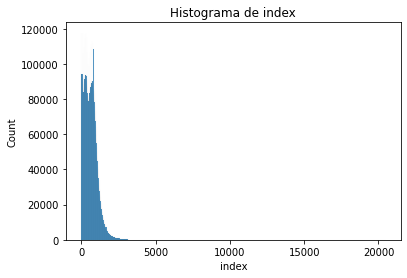

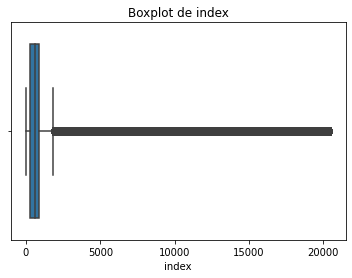

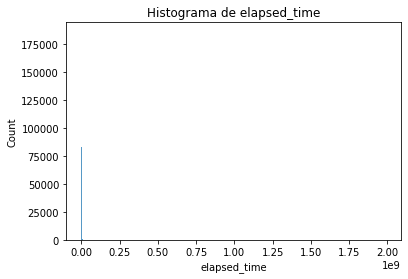

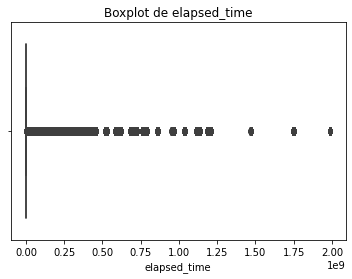

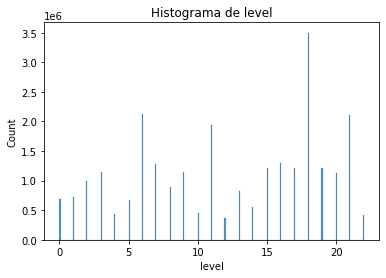

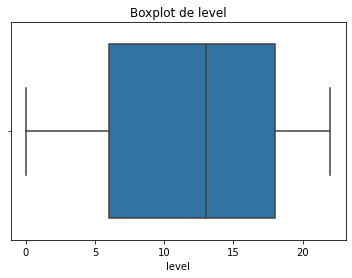

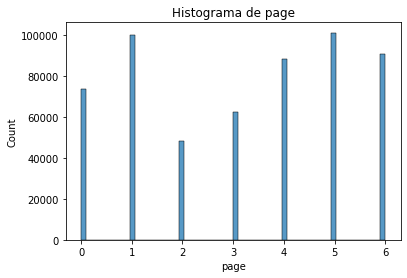

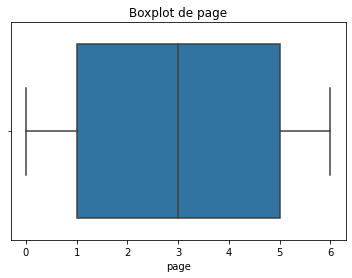

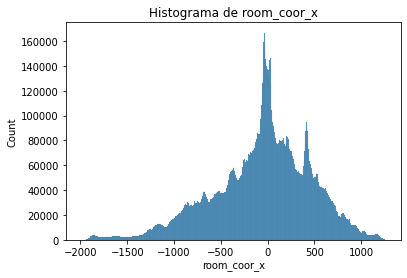

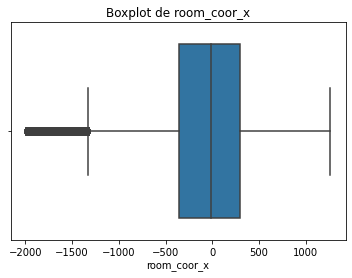

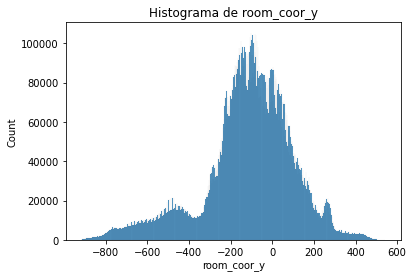

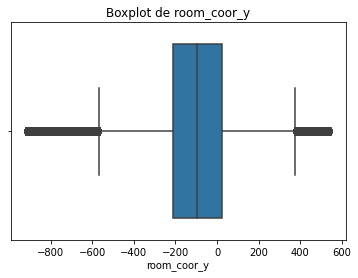

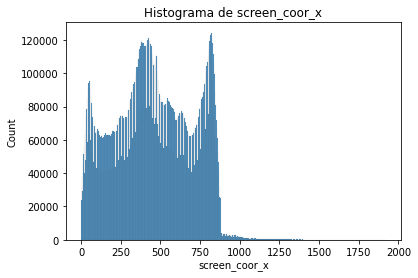

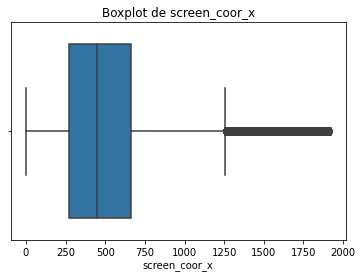

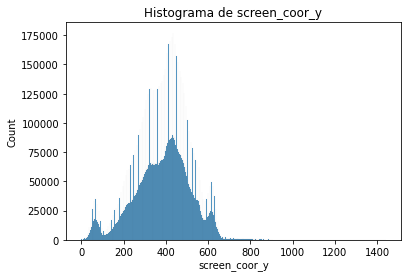

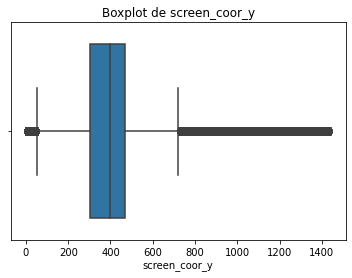

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000015E2413B430> (for post_execute):


KeyboardInterrupt: 

In [15]:
for col in NUMERICAL:
    plt.figure()
    sns.histplot(train_df[col])
    plt.title(f'Histograma de {col}')
    plt.show()
    
    plt.figure()
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

#### Index

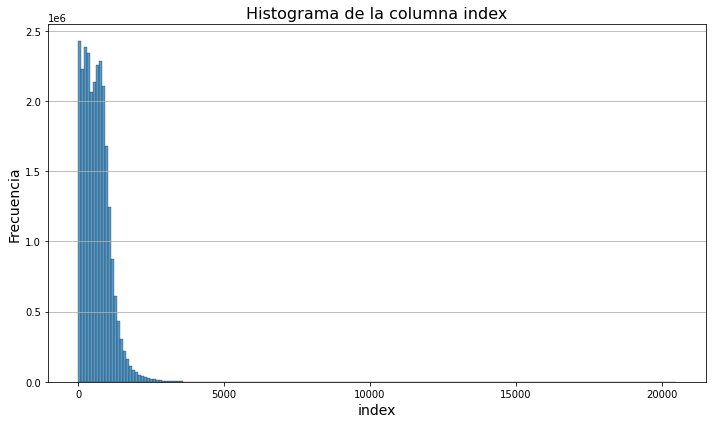

In [54]:
plot_histogram(train_df, "index", density=False, bins=200)

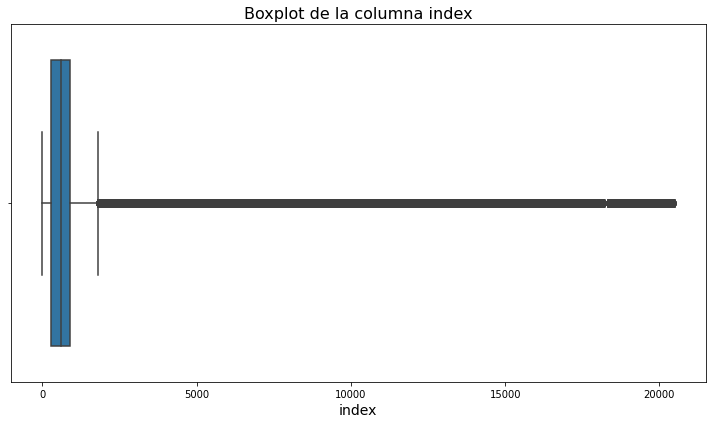

In [55]:
plot_boxplot(train_df,"index")

In [18]:
index_outliers = get_outliers(train_df,"index")

Los límites inferior y superior son: -624.0 1808.0


In [19]:
index_outliers

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,elapsed_time_log,hover_duration_log
2645,20090312433251036,1809,3688470,navigate_click,undefined,21,NaN,486.290497,-277.507263,723.0,...,NaN,NaN,tunic.historicalsociety.entry,NaN,0,0,0,13-22,15.120723,NaN
2646,20090312433251036,1810,3689323,navigate_click,undefined,21,NaN,594.008728,-231.946686,756.0,...,NaN,NaN,tunic.historicalsociety.entry,NaN,0,0,0,13-22,15.120954,NaN
2647,20090312433251036,1811,3689124,navigate_click,undefined,21,NaN,647.115234,-229.704193,757.0,...,NaN,NaN,tunic.historicalsociety.entry,NaN,0,0,0,13-22,15.120900,NaN
2648,20090312433251036,1812,3689370,navigate_click,undefined,21,NaN,695.634888,-227.981415,757.0,...,NaN,NaN,tunic.historicalsociety.entry,NaN,0,0,0,13-22,15.120967,NaN
2649,20090312433251036,1813,3689993,navigate_click,undefined,21,NaN,780.624329,-226.234360,757.0,...,NaN,NaN,tunic.historicalsociety.entry,NaN,0,0,0,13-22,15.121135,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26290395,22100215190998610,2337,4350196,map_hover,basic,22,NaN,NaN,NaN,NaN,...,NaN,tunic.humanecology,tunic.historicalsociety.entry,NaN,0,0,1,13-22,15.285732,5.123964
26290396,22100215190998610,2338,4350729,map_click,undefined,22,NaN,499.207123,46.562485,469.0,...,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,0,0,1,13-22,15.285854,NaN
26290397,22100215190998610,2339,4351802,navigate_click,undefined,22,NaN,119.644867,-79.965637,335.0,...,NaN,NaN,tunic.capitol_2.hall,NaN,0,0,1,13-22,15.286101,NaN
26290398,22100215190998610,2340,4352130,navigate_click,undefined,22,NaN,232.883575,-14.205050,430.0,...,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22,15.286176,NaN


In [10]:
len(index_outliers["session_id"].unique())

1079

In [11]:
(1079/23562)*100

4.579407520583991

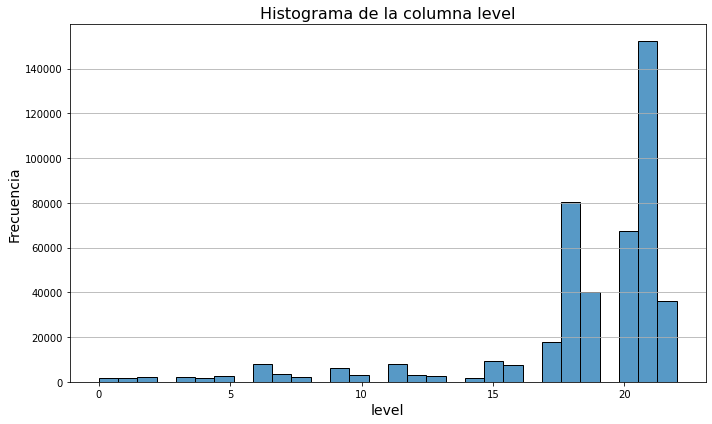

In [23]:
plot_histogram(index_outliers,"level",False)

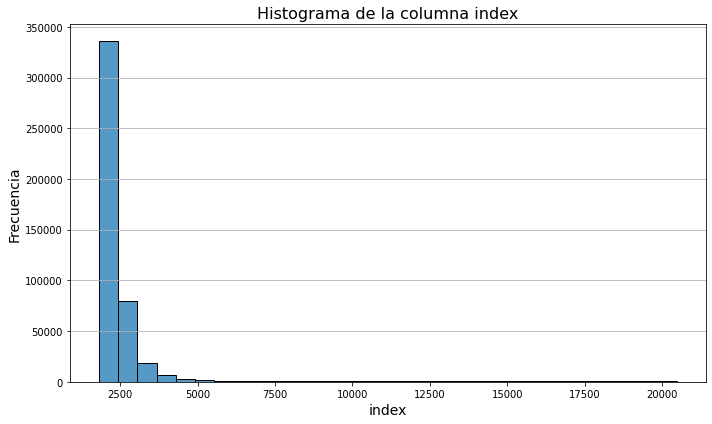

In [24]:
plot_histogram(index_outliers,"index",False)

In [26]:
len(train_df[train_df["index"]>4000]["session_id"].unique())

12

In [29]:
len(train_df[train_df["index"]>2500]["session_id"].unique())

212

In [33]:
(212/23562)*100

0.8997538409303115

In [32]:
len(train_df[train_df["index"]>1808]["session_id"].unique())

1079

In [34]:
len(train_df[train_df["index"]>2000]["session_id"].unique())

655

#### Elapsed time (tiempo transcurrido desde inicio de sesion)

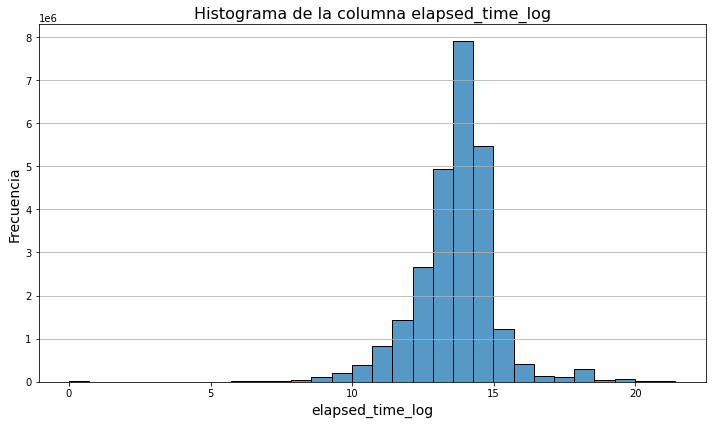

In [35]:
plot_histogram(train_df,"elapsed_time_log")

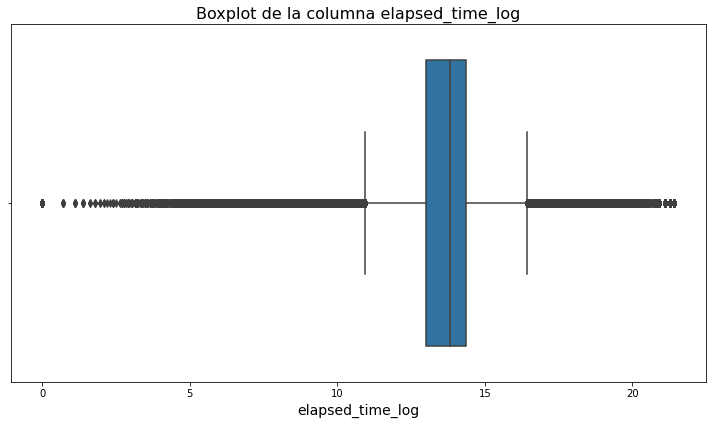

In [37]:
plot_boxplot(train_df,"elapsed_time_log")

In [38]:
elapsed_time_outliers = get_outliers(train_df,"elapsed_time_log")

Los límites inferior y superior son: 10.924474487143879 16.442809799944822


In [40]:
len(train_df[train_df["elapsed_time_log"]>16.442809799944822]["session_id"].unique())

1215

In [41]:
len(train_df[train_df["elapsed_time_log"]>18]["session_id"].unique())

684

1 día son 86400000 milisegundos, en escala log esto equivale a 18.27

In [42]:
len(train_df[train_df["elapsed_time_log"]>18.27]["session_id"].unique())

381

In [45]:
filter_and_calculate_percentage(train_df,"elapsed_time_log",18.27,"greater")

(381, 1.6170104405398522)

#### Level

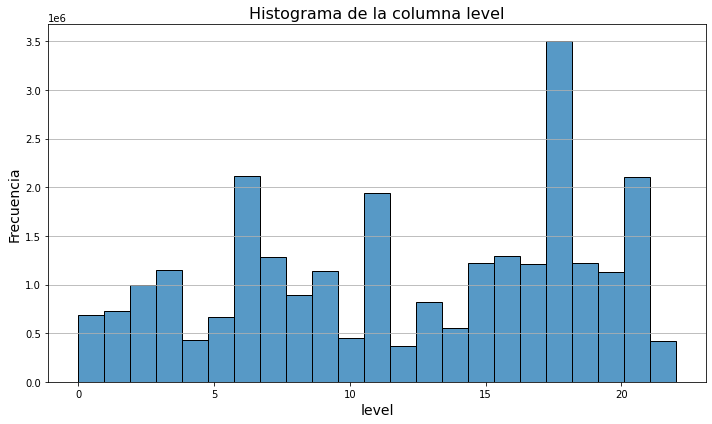

In [57]:
plot_histogram(train_df,"level",bins=23)

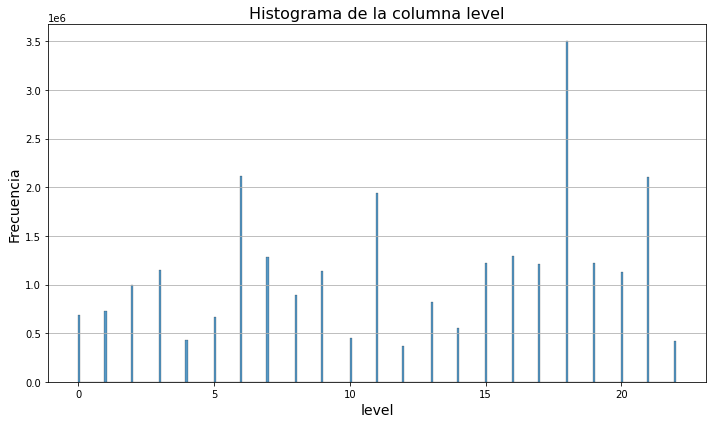

In [49]:
plt.figure(figsize=(10, 6))
    
    
    
sns.histplot(train_df["level"])
    
plt.title(f'Histograma de la columna {"level"}', fontsize=16)
plt.xlabel("level", fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [87]:
value_counts_level = train_df["level"].value_counts()
# Calcula el porcentaje de cada valor único
percentage_counts_level = round((value_counts_level / value_counts_level.sum()) * 100,2)
percentage_counts_level

level
18    13.31
6      8.05
21     8.02
11     7.37
16     4.92
7      4.86
15     4.64
19     4.63
17     4.59
3      4.35
9      4.33
20     4.29
2      3.77
8      3.38
13     3.13
1      2.76
0      2.62
5      2.54
14     2.09
10     1.71
4      1.63
22     1.59
12     1.40
Name: count, dtype: float64

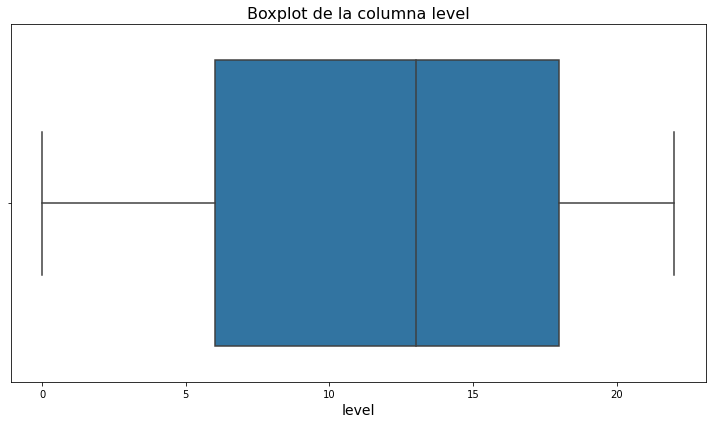

In [48]:
plot_boxplot(train_df,"level")

#### Page

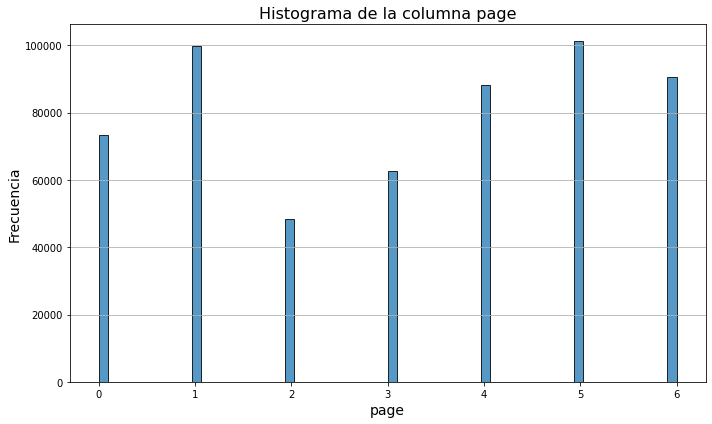

In [58]:
plt.figure(figsize=(10, 6))
    
sns.histplot(train_df["page"])
    
plt.title(f'Histograma de la columna {"page"}', fontsize=16)
plt.xlabel("page", fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [83]:
value_counts_page = train_df["page"].value_counts()
# Calcula el porcentaje de cada valor único
percentage_counts_page = round((value_counts_page / value_counts_page.sum()) * 100,2)

In [84]:
percentage_counts_page

page
5.0    17.92
1.0    17.70
6.0    16.07
4.0    15.62
0.0    13.02
3.0    11.08
2.0     8.59
Name: count, dtype: float64

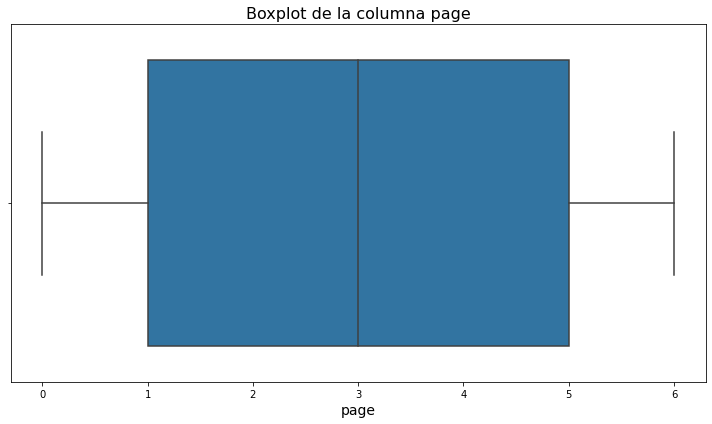

In [59]:
plot_boxplot(train_df,"page")

#### Room coords

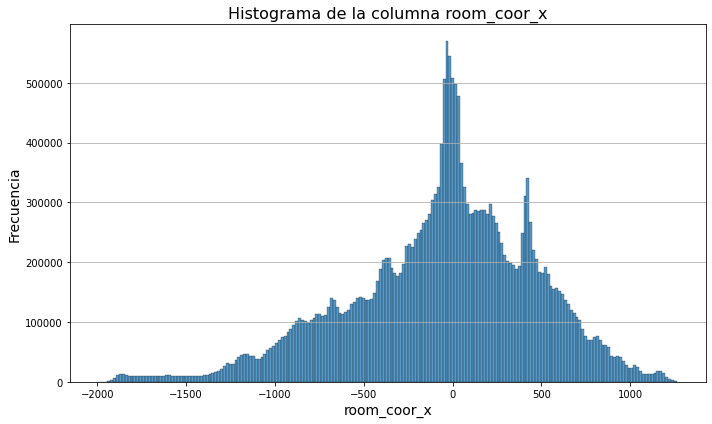

In [65]:
plot_histogram(train_df, "room_coor_x", density=False, bins=200)

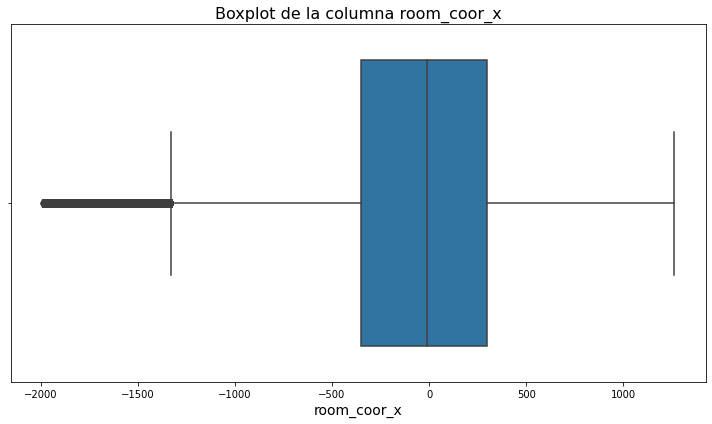

In [66]:
plot_boxplot(train_df,"room_coor_x")

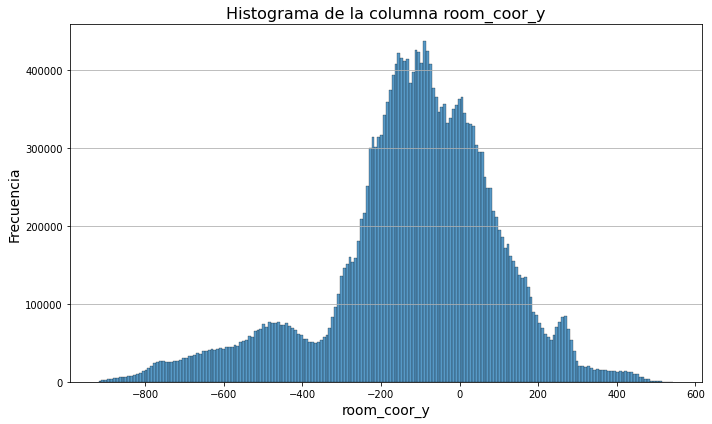

In [67]:
plot_histogram(train_df, "room_coor_y", density=False, bins=200)

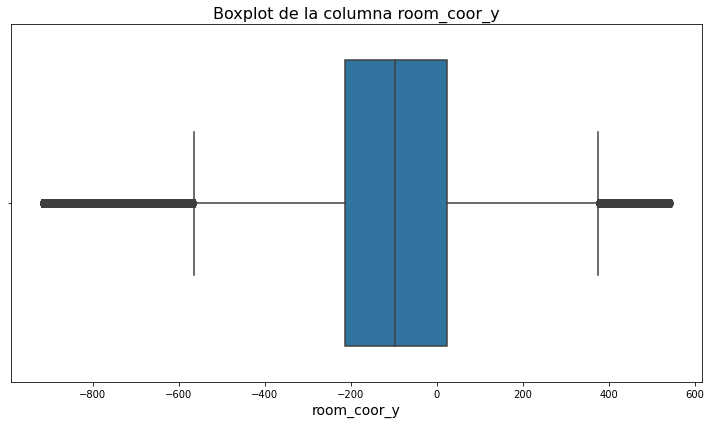

In [68]:
plot_boxplot(train_df,"room_coor_y")

#### Screen coor

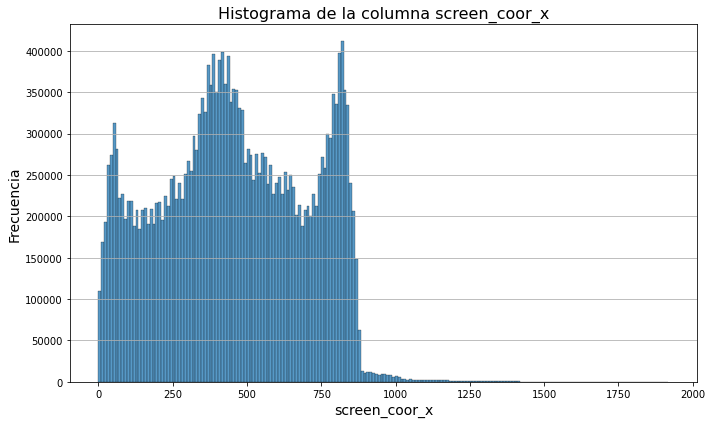

In [69]:
plot_histogram(train_df, "screen_coor_x", density=False, bins=200)

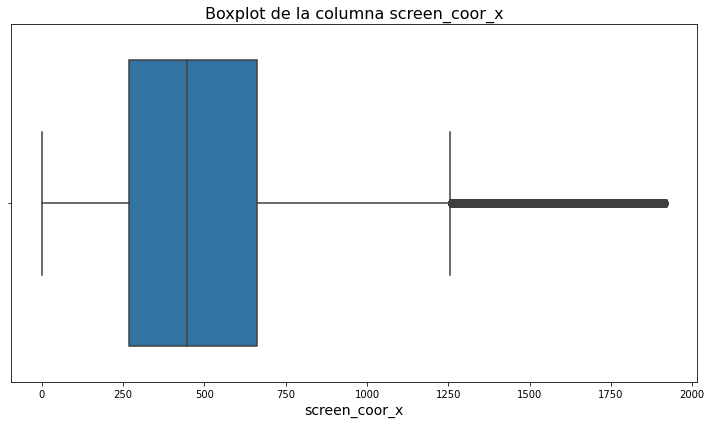

In [70]:
plot_boxplot(train_df,"screen_coor_x")

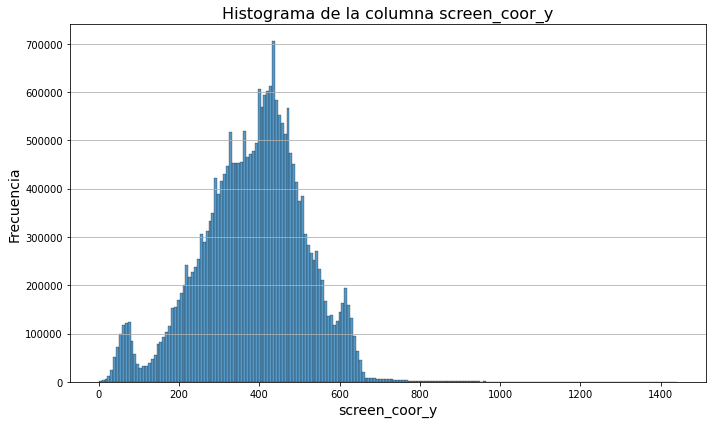

In [71]:
plot_histogram(train_df, "screen_coor_y", density=False, bins=200)

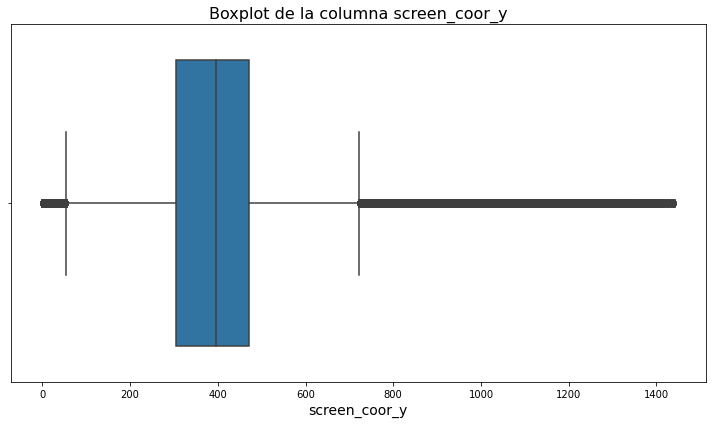

In [72]:
plot_boxplot(train_df,"screen_coor_y")

#### Hover duration

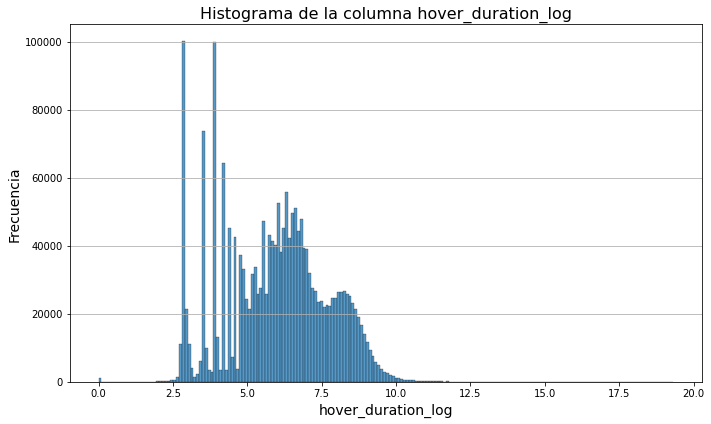

In [76]:
plot_histogram(train_df, "hover_duration_log", density=False, bins=200)

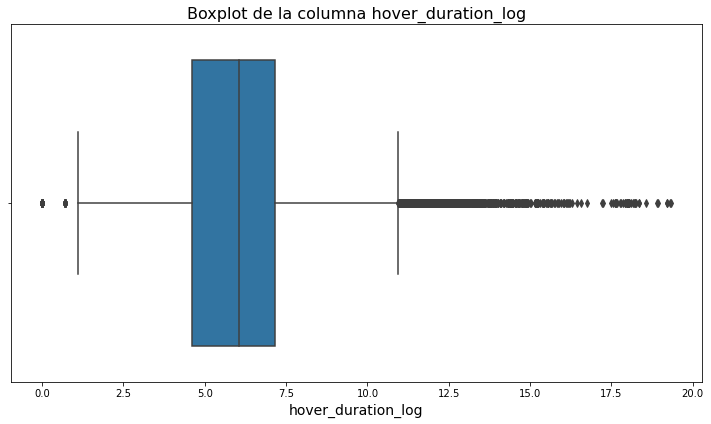

In [75]:
plot_boxplot(train_df,"hover_duration_log")

### Variables Categóricas

In [79]:
CATEGORICAL

['event_name',
 'name',
 'text',
 'fqid',
 'room_fqid',
 'text_fqid',
 'fullscreen',
 'hq',
 'music',
 'level_group']

#### Event Name

In [14]:
len(train_df["event_name"].unique())

11

In [90]:
list(train_df["event_name"].unique())

['cutscene_click',
 'person_click',
 'navigate_click',
 'observation_click',
 'notification_click',
 'object_click',
 'object_hover',
 'map_hover',
 'map_click',
 'checkpoint',
 'notebook_click']

In [92]:
train_df["event_name"].value_counts()

event_name
navigate_click        11326433
person_click           6052853
cutscene_click         2703035
object_click           2198211
object_hover           1057085
map_hover               945159
notification_click      649001
notebook_click          564544
map_click               517242
observation_click       212355
checkpoint               71028
Name: count, dtype: int64

In [93]:
value_counts_event_name = train_df["event_name"].value_counts()
# Calcula el porcentaje de cada valor único
percentage_counts_event_name = round((value_counts_event_name / value_counts_event_name.sum()) * 100,2)
percentage_counts_event_name

event_name
navigate_click        43.07
person_click          23.02
cutscene_click        10.28
object_click           8.36
object_hover           4.02
map_hover              3.59
notification_click     2.47
notebook_click         2.15
map_click              1.97
observation_click      0.81
checkpoint             0.27
Name: count, dtype: float64

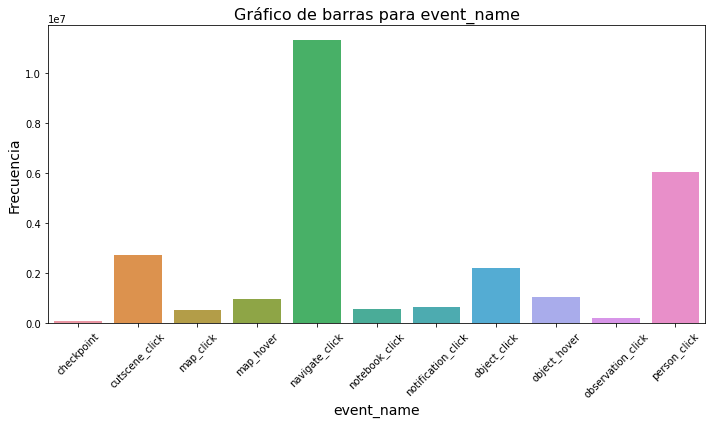

In [27]:
plot_categorical_bar(train_df, "event_name")

#### Name

In [15]:
len(train_df["name"].unique())

6

In [17]:
list(train_df["name"].unique())

['basic', 'undefined', 'close', 'open', 'prev', 'next']

In [18]:
train_df["name"].value_counts()

name
undefined    12705785
basic        12648469
close          676696
open           235139
prev            19250
next            11607
Name: count, dtype: int64

In [22]:
calculate_value_counts_and_percentage(train_df, "name")

name
undefined    48.32
basic        48.10
close         2.57
open          0.89
prev          0.07
next          0.04
Name: count, dtype: float64

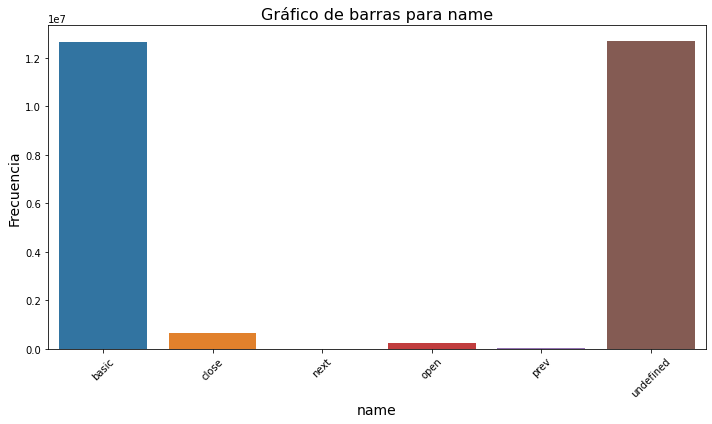

In [26]:
plot_categorical_bar(train_df, "name")

#### Text

In [ ]:
len(train_df["event_name"].unique())
list(train_df["event_name"].unique())
train_df["event_name"].value_counts()
calculate_value_counts_and_percentage(train_df, "name")
plot_categorical_bar(train_df, "name")
plot_bar_with_cumulative_percentage(dataframe, column_name)

In [28]:
len(train_df["text"].unique())

598

In [29]:
list(train_df["text"].unique())

['undefined',
 'Whatcha doing over there, Jo?',
 'Just talking to Teddy.',
 'I gotta run to my meeting!',
 'Can I come, Gramps?',
 'Sure thing, Jo. Grab your notebook and come upstairs!',
 'See you later, Teddy.',
 "I get to go to Gramps's meeting!",
 'Now where did I put my notebook?',
 '\\u00f0\\u0178\\u02dc\\u00b4',
 nan,
 'I love these photos of me and Teddy!',
 'Found it!',
 'Gramps is in trouble for losing papers?',
 "This can't be right!",
 'Gramps is a great historian!',
 "Hmm. Button's still not working.",
 "Let's get started. The Wisconsin Wonders exhibit opens tomorrow!",
 'Who wants to investigate the shirt artifact?',
 "Not Leopold here. He's been losing papers lately.",
 'Hey!',
 "It's true, they do keep going missing lately.",
 'See?',
 'Besides, I already figured out the shirt.',
 "It's a women's basketball jersey!",
 'That settles it.',
 'Wells, finish up your report.',
 "Leopold, why don't you help me set up in the Capitol?",
 'We need to talk about that missing paper

In [30]:
train_df["text"].value_counts()

text
undefined                                      355969
\u00f0\u0178\u02dc\u0090                        48805
Hey!                                            47452
I should go to the Capitol and tell Mrs. M!     40463
This is perfect for the exhibit.                40218
                                                ...  
I figured out that you kidnapped him!               1
Here I am!                                          1
He needs our help!                                  1
He got a park named after him? Cool!                1
Why don't you prove your case?                      1
Name: count, Length: 597, dtype: int64

In [31]:
calculate_value_counts_and_percentage(train_df, "text")

text
undefined                                      3.70
\u00f0\u0178\u02dc\u0090                       0.51
Hey!                                           0.49
I should go to the Capitol and tell Mrs. M!    0.42
This is perfect for the exhibit.               0.42
                                               ... 
I figured out that you kidnapped him!          0.00
Here I am!                                     0.00
He needs our help!                             0.00
He got a park named after him? Cool!           0.00
Why don't you prove your case?                 0.00
Name: count, Length: 597, dtype: float64

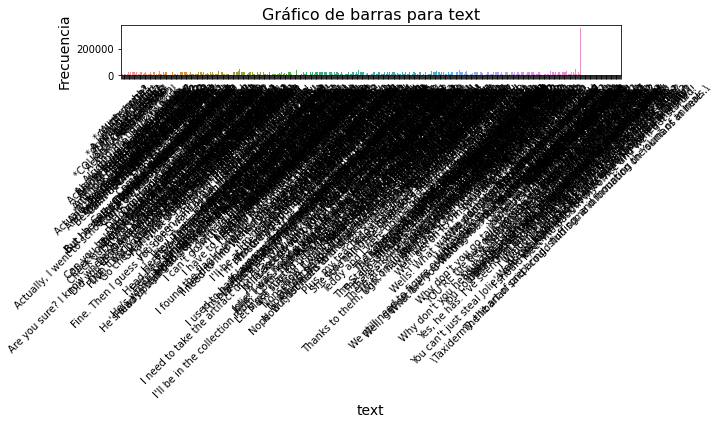

In [33]:
plot_categorical_bar(train_df, "text")

In [35]:
get_top_70_percent_values(train_df, "text")

['undefined',
 '\\u00f0\\u0178\\u02dc\\u0090',
 'Hey!',
 'I should go to the Capitol and tell Mrs. M!',
 'This is perfect for the exhibit.',
 'Look at all those activists!',
 "If I were you, I'd go to the library and do some digging.",
 'Ugh. Fine.',
 '\\u00f0\\u0178\\u02dc\\u00b4',
 'You can talk to a textile expert there.',
 "Hey Jo, let's take a look at the shirt!",
 "Hang on. I'll get you out of there!",
 'Teddy!!!',
 'I wonder whose glasses these are.',
 'Can you help me tidy up?',
 'Thanks for your help, kid!',
 'Your grampa is waiting for you in the collection room.',
 'Thanks for the help!',
 "Hmmm... not sure. Why don't you try the library?",
 'Do you know who Theodora Youmans is?',
 'I should go to the Capitol and tell everyone!',
 "And look! She's wearing the shirt!",
 'Hey, this is Youmans!',
 "It's locked!",
 'Ugh! Those cups are all over the place.',
 "I need to get her free. She won't hold still!",
 'Sure! Give it a try.',
 "It's lucky we found her.",
 'Any ideas?',
 'Ca

#### text_fqid

In [ ]:
len(train_df["event_name"].unique())
list(train_df["event_name"].unique())
train_df["event_name"].value_counts()
calculate_value_counts_and_percentage(train_df, "name")
plot_categorical_bar(train_df, "name")
get_top_70_percent_values(train_df, "text")
plot_bar_with_cumulative_percentage(train_df, "text")

In [37]:
len(train_df["text_fqid"].unique())

127

In [38]:
list(train_df["text_fqid"].unique())

['tunic.historicalsociety.closet.intro',
 'tunic.historicalsociety.closet.gramps.intro_0_cs_0',
 'tunic.historicalsociety.closet.teddy.intro_0_cs_0',
 nan,
 'tunic.historicalsociety.closet.teddy.intro_0_cs_5',
 'tunic.historicalsociety.closet.photo',
 'tunic.historicalsociety.closet.notebook',
 'tunic.historicalsociety.closet.retirement_letter.hub',
 'tunic.historicalsociety.basement.janitor',
 'tunic.historicalsociety.entry.groupconvo',
 'tunic.historicalsociety.entry.boss.talktogramps',
 'tunic.historicalsociety.entry.wells.talktogramps',
 'tunic.historicalsociety.collection.cs',
 'tunic.historicalsociety.collection.tunic.slip',
 'tunic.historicalsociety.collection.gramps.found',
 'tunic.historicalsociety.stacks.outtolunch',
 'tunic.kohlcenter.halloffame.plaque.face.date',
 'tunic.kohlcenter.halloffame.togrampa',
 'tunic.capitol_0.hall.boss.talktogramps',
 'tunic.historicalsociety.closet_dirty.what_happened',
 'tunic.historicalsociety.closet_dirty.gramps.helpclean',
 'tunic.historica

In [39]:
train_df["text_fqid"].value_counts()

text_fqid
tunic.historicalsociety.cage.confrontation               666557
tunic.wildlife.center.crane_ranger.crane                 470755
tunic.historicalsociety.frontdesk.archivist.newspaper    429762
tunic.historicalsociety.entry.groupconvo                 427180
tunic.wildlife.center.wells.nodeer                       399967
                                                          ...  
tunic.capitol_2.hall.chap4_finale_c                         280
tunic.drycleaner.frontdesk.block_0                          221
tunic.historicalsociety.entry.gramps.hub                     39
tunic.humanecology.frontdesk.block_1                         13
tunic.drycleaner.frontdesk.block_1                            3
Name: count, Length: 126, dtype: int64

In [40]:
calculate_value_counts_and_percentage(train_df, "text_fqid")

text_fqid
tunic.historicalsociety.cage.confrontation               6.93
tunic.wildlife.center.crane_ranger.crane                 4.89
tunic.historicalsociety.frontdesk.archivist.newspaper    4.47
tunic.historicalsociety.entry.groupconvo                 4.44
tunic.wildlife.center.wells.nodeer                       4.16
                                                         ... 
tunic.capitol_2.hall.chap4_finale_c                      0.00
tunic.drycleaner.frontdesk.block_0                       0.00
tunic.historicalsociety.entry.gramps.hub                 0.00
tunic.humanecology.frontdesk.block_1                     0.00
tunic.drycleaner.frontdesk.block_1                       0.00
Name: count, Length: 126, dtype: float64

In [43]:
text_fqid_70 = get_top_70_percent_values(train_df, "text_fqid")

In [49]:
get_top_70_percent_values(train_df, "text_fqid")

[('tunic.historicalsociety.cage.confrontation', 666557, 6.93),
 ('tunic.wildlife.center.crane_ranger.crane', 470755, 4.89),
 ('tunic.historicalsociety.frontdesk.archivist.newspaper', 429762, 4.47),
 ('tunic.historicalsociety.entry.groupconvo', 427180, 4.44),
 ('tunic.wildlife.center.wells.nodeer', 399967, 4.16),
 ('tunic.historicalsociety.frontdesk.archivist.have_glass', 394908, 4.11),
 ('tunic.drycleaner.frontdesk.worker.hub', 362883, 3.77),
 ('tunic.historicalsociety.closet_dirty.gramps.news', 334439, 3.48),
 ('tunic.humanecology.frontdesk.worker.intro', 300110, 3.12),
 ('tunic.historicalsociety.frontdesk.archivist_glasses.confrontation',
  263308,
  2.74),
 ('tunic.historicalsociety.basement.seescratches', 260236, 2.71),
 ('tunic.historicalsociety.collection.cs', 259499, 2.7),
 ('tunic.flaghouse.entry.flag_girl.hello', 238202, 2.48),
 ('tunic.historicalsociety.collection.gramps.found', 216279, 2.25),
 ('tunic.historicalsociety.basement.ch3start', 214118, 2.23),
 ('tunic.historicalso

In [44]:
len(text_fqid_70)

23

In [45]:
text_fqid_70

['tunic.historicalsociety.cage.confrontation',
 'tunic.wildlife.center.crane_ranger.crane',
 'tunic.historicalsociety.frontdesk.archivist.newspaper',
 'tunic.historicalsociety.entry.groupconvo',
 'tunic.wildlife.center.wells.nodeer',
 'tunic.historicalsociety.frontdesk.archivist.have_glass',
 'tunic.drycleaner.frontdesk.worker.hub',
 'tunic.historicalsociety.closet_dirty.gramps.news',
 'tunic.humanecology.frontdesk.worker.intro',
 'tunic.historicalsociety.frontdesk.archivist_glasses.confrontation',
 'tunic.historicalsociety.basement.seescratches',
 'tunic.historicalsociety.collection.cs',
 'tunic.flaghouse.entry.flag_girl.hello',
 'tunic.historicalsociety.collection.gramps.found',
 'tunic.historicalsociety.basement.ch3start',
 'tunic.historicalsociety.entry.groupconvo_flag',
 'tunic.library.frontdesk.worker.hello',
 'tunic.library.frontdesk.worker.wells',
 'tunic.historicalsociety.collection_flag.gramps.flag',
 'tunic.historicalsociety.basement.savedteddy',
 'tunic.library.frontdesk.wo

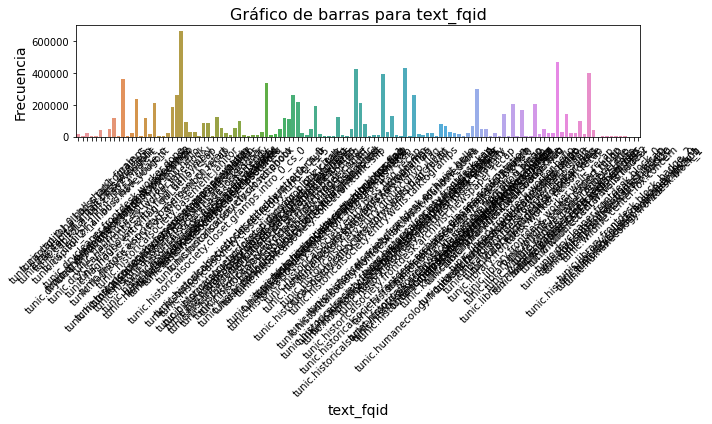

In [47]:
plot_categorical_bar(train_df, "text_fqid")

#### fqid

In [ ]:
len(train_df["fqid"].unique())
list(train_df["fqid"].unique())
train_df["fqid"].value_counts()
calculate_value_counts_and_percentage(train_df, "fqid")
plot_categorical_bar(train_df, "fqid")
get_top_70_percent_values(train_df, "fqid")
plot_bar_with_cumulative_percentage(train_df, "fqid")

In [50]:
len(train_df["fqid"].unique())

129

In [51]:
list(train_df["fqid"].unique())

['intro',
 'gramps',
 'teddy',
 'photo',
 nan,
 'notebook',
 'retirement_letter',
 'tobasement',
 'janitor',
 'toentry',
 'groupconvo',
 'report',
 'boss',
 'wells',
 'directory',
 'tocollection',
 'cs',
 'tunic',
 'tunic.hub.slip',
 'tostacks',
 'outtolunch',
 'tocloset',
 'tomap',
 'tunic.historicalsociety',
 'tunic.kohlcenter',
 'plaque',
 'plaque.face.date',
 'togrampa',
 'tunic.capitol_0',
 'chap1_finale',
 'chap1_finale_c',
 'tocloset_dirty',
 'what_happened',
 'trigger_scarf',
 'trigger_coffee',
 'tunic.capitol_1',
 'tofrontdesk',
 'archivist',
 'magnify',
 'tunic.humanecology',
 'worker',
 'businesscards',
 'businesscards.card_0.next',
 'businesscards.card_1.next',
 'businesscards.card_bingo.next',
 'businesscards.card_bingo.bingo',
 'tohallway',
 'tunic.drycleaner',
 'logbook',
 'logbook.page.bingo',
 'tunic.library',
 'tomicrofiche',
 'reader',
 'reader.paper0.next',
 'reader.paper1.next',
 'reader.paper2.bingo',
 'wellsbadge',
 'journals',
 'journals.hub.topics',
 'journals.

In [52]:
train_df["fqid"].value_counts()

fqid
worker           1878958
archivist        1127341
gramps           1122264
wells             787418
toentry           784496
                  ...   
need_glasses        1297
block_badge_2        993
fox                  465
block_1               37
chap2_finale           1
Name: count, Length: 128, dtype: int64

In [54]:
len(get_top_70_percent_values(train_df, "fqid"))

27

In [55]:
get_top_70_percent_values(train_df, "fqid")

[('worker', 1878958, 10.43),
 ('archivist', 1127341, 6.26),
 ('gramps', 1122264, 6.23),
 ('wells', 787418, 4.37),
 ('toentry', 784496, 4.35),
 ('confrontation', 697098, 3.87),
 ('crane_ranger', 503927, 2.8),
 ('groupconvo', 455705, 2.53),
 ('flag_girl', 449742, 2.5),
 ('tomap', 403048, 2.24),
 ('tostacks', 337276, 1.87),
 ('tobasement', 324815, 1.8),
 ('archivist_glasses', 316855, 1.76),
 ('boss', 303627, 1.68),
 ('journals', 298369, 1.66),
 ('seescratches', 292348, 1.62),
 ('groupconvo_flag', 271927, 1.51),
 ('cs', 259499, 1.44),
 ('teddy', 238471, 1.32),
 ('expert', 236033, 1.31),
 ('businesscards', 221564, 1.23),
 ('ch3start', 214118, 1.19),
 ('tunic.historicalsociety', 213820, 1.19),
 ('tofrontdesk', 198679, 1.1),
 ('savedteddy', 185823, 1.03),
 ('glasses', 183157, 1.02),
 ('plaque', 183011, 1.02)]

#### room_fqid

In [ ]:
len(train_df["room_fqid"].unique())
list(train_df["room_fqid"].unique())
train_df["room_fqid"].value_counts()
calculate_value_counts_and_percentage(train_df, "room_fqid")
plot_categorical_bar(train_df, "room_fqid")
get_top_70_percent_values(train_df, "room_fqid")
plot_bar_with_cumulative_percentage(train_df, "room_fqid")

In [56]:
len(train_df["room_fqid"].unique())

19

In [57]:
list(train_df["room_fqid"].unique())

['tunic.historicalsociety.closet',
 'tunic.historicalsociety.basement',
 'tunic.historicalsociety.entry',
 'tunic.historicalsociety.collection',
 'tunic.historicalsociety.stacks',
 'tunic.kohlcenter.halloffame',
 'tunic.capitol_0.hall',
 'tunic.historicalsociety.closet_dirty',
 'tunic.historicalsociety.frontdesk',
 'tunic.humanecology.frontdesk',
 'tunic.drycleaner.frontdesk',
 'tunic.library.frontdesk',
 'tunic.library.microfiche',
 'tunic.capitol_1.hall',
 'tunic.historicalsociety.cage',
 'tunic.historicalsociety.collection_flag',
 'tunic.wildlife.center',
 'tunic.flaghouse.entry',
 'tunic.capitol_2.hall']

In [58]:
train_df["room_fqid"].value_counts()

room_fqid
tunic.historicalsociety.entry              3622003
tunic.wildlife.center                      3013154
tunic.historicalsociety.cage               2352083
tunic.library.frontdesk                    2145666
tunic.historicalsociety.frontdesk          1943066
tunic.historicalsociety.stacks             1794007
tunic.historicalsociety.closet_dirty       1568994
tunic.humanecology.frontdesk               1326890
tunic.historicalsociety.basement           1168090
tunic.kohlcenter.halloffame                1096872
tunic.library.microfiche                    995674
tunic.drycleaner.frontdesk                  981451
tunic.historicalsociety.collection          957400
tunic.historicalsociety.closet              857273
tunic.flaghouse.entry                       833793
tunic.historicalsociety.collection_flag     452397
tunic.capitol_1.hall                        445569
tunic.capitol_0.hall                        416469
tunic.capitol_2.hall                        326095
Name: count, dtype: i

In [59]:
calculate_value_counts_and_percentage(train_df, "room_fqid")

room_fqid
tunic.historicalsociety.entry              13.77
tunic.wildlife.center                      11.46
tunic.historicalsociety.cage                8.94
tunic.library.frontdesk                     8.16
tunic.historicalsociety.frontdesk           7.39
tunic.historicalsociety.stacks              6.82
tunic.historicalsociety.closet_dirty        5.97
tunic.humanecology.frontdesk                5.05
tunic.historicalsociety.basement            4.44
tunic.kohlcenter.halloffame                 4.17
tunic.library.microfiche                    3.79
tunic.drycleaner.frontdesk                  3.73
tunic.historicalsociety.collection          3.64
tunic.historicalsociety.closet              3.26
tunic.flaghouse.entry                       3.17
tunic.historicalsociety.collection_flag     1.72
tunic.capitol_1.hall                        1.69
tunic.capitol_0.hall                        1.58
tunic.capitol_2.hall                        1.24
Name: count, dtype: float64

AttributeError: module 'matplotlib.pyplot' has no attribute 'PercentFormatter'

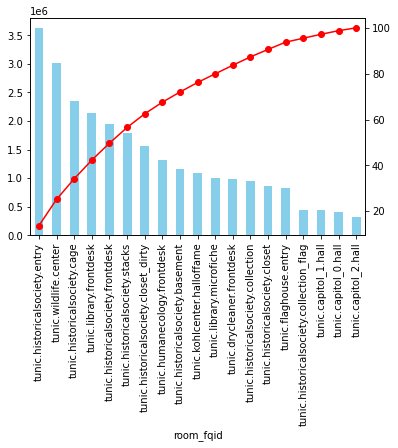

In [60]:
plot_bar_with_cumulative_percentage(train_df, "room_fqid")

In [61]:
get_top_70_percent_values(train_df, "room_fqid")

[('tunic.historicalsociety.entry', 3622003, 13.77),
 ('tunic.wildlife.center', 3013154, 11.46),
 ('tunic.historicalsociety.cage', 2352083, 8.94),
 ('tunic.library.frontdesk', 2145666, 8.16),
 ('tunic.historicalsociety.frontdesk', 1943066, 7.39),
 ('tunic.historicalsociety.stacks', 1794007, 6.82),
 ('tunic.historicalsociety.closet_dirty', 1568994, 5.97),
 ('tunic.humanecology.frontdesk', 1326890, 5.05)]

In [79]:
len(get_top_70_percent_values(train_df, "room_fqid"))

8

#### fullscreen

In [ ]:
len(train_df["fullscreen"].unique())
list(train_df["fullscreen"].unique())
train_df["fullscreen"].value_counts()
calculate_value_counts_and_percentage(train_df, "fullscreen")
plot_categorical_bar(train_df, "fullscreen")
get_top_70_percent_values(train_df, "fullscreen")
plot_bar_with_cumulative_percentage(train_df, "fullscreen")

In [62]:
len(train_df["fullscreen"].unique())

2

In [63]:
train_df["fullscreen"].value_counts()

fullscreen
0    22694166
1     3602780
Name: count, dtype: int64

In [64]:
calculate_value_counts_and_percentage(train_df, "fullscreen")

fullscreen
0    86.3
1    13.7
Name: count, dtype: float64

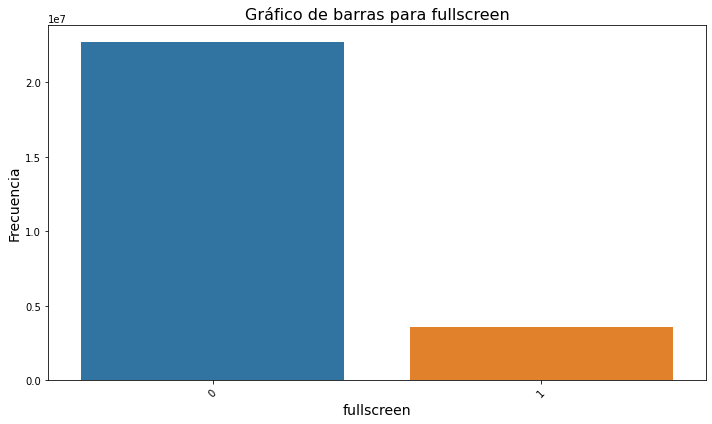

In [65]:
plot_categorical_bar(train_df, "fullscreen")

#### hq

In [ ]:
len(train_df["hq"].unique())
list(train_df["hq"].unique())
train_df["hq"].value_counts()
calculate_value_counts_and_percentage(train_df, "hq")
plot_categorical_bar(train_df, "hq")
get_top_70_percent_values(train_df, "hq")
plot_bar_with_cumulative_percentage(train_df, "hq")

In [66]:
len(train_df["hq"].unique())

2

In [67]:
train_df["hq"].value_counts()

hq
0    23135929
1     3161017
Name: count, dtype: int64

In [68]:
calculate_value_counts_and_percentage(train_df, "hq")

hq
0    87.98
1    12.02
Name: count, dtype: float64

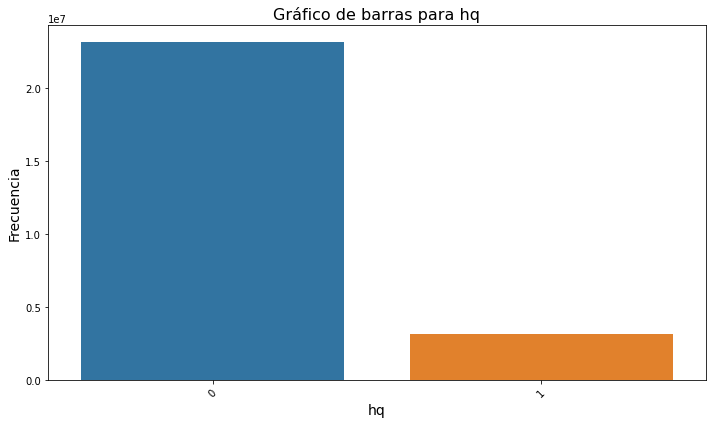

In [70]:
plot_categorical_bar(train_df, "hq")

#### music

In [ ]:
len(train_df["hq"].unique())
list(train_df["hq"].unique())
train_df["hq"].value_counts()
calculate_value_counts_and_percentage(train_df, "hq")
plot_categorical_bar(train_df, "hq")
get_top_70_percent_values(train_df, "hq")
plot_bar_with_cumulative_percentage(train_df, "hq")

In [71]:
len(train_df["music"].unique())

2

In [72]:
train_df["music"].value_counts()

music
1    24439799
0     1857147
Name: count, dtype: int64

In [73]:
calculate_value_counts_and_percentage(train_df, "music")

music
1    92.94
0     7.06
Name: count, dtype: float64

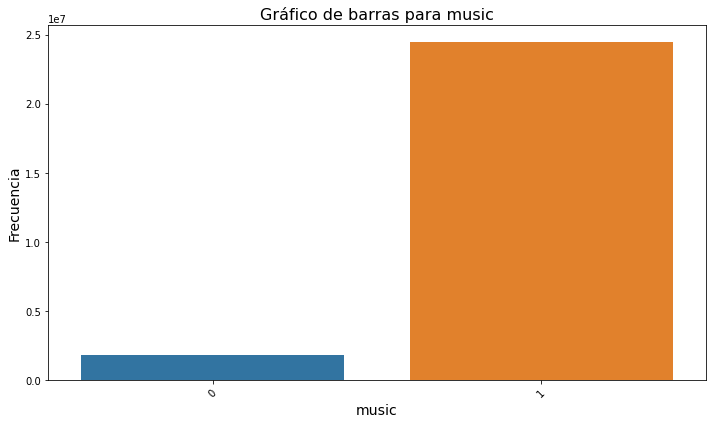

In [74]:
plot_categorical_bar(train_df, "music")

#### level_group

In [ ]:
len(train_df["level_group"].unique())
list(train_df["level_group"].unique())
train_df["level_group"].value_counts()
calculate_value_counts_and_percentage(train_df, "level_group")
plot_categorical_bar(train_df, "level_group")
get_top_70_percent_values(train_df, "level_group")
plot_bar_with_cumulative_percentage(train_df, "level_group")

In [75]:
len(train_df["level_group"].unique())

3

In [76]:
train_df["level_group"].value_counts()

level_group
13-22    13471703
5-12      8844238
0-4       3981005
Name: count, dtype: int64

In [77]:
calculate_value_counts_and_percentage(train_df, "level_group")

level_group
13-22    51.23
5-12     33.63
0-4      15.14
Name: count, dtype: float64

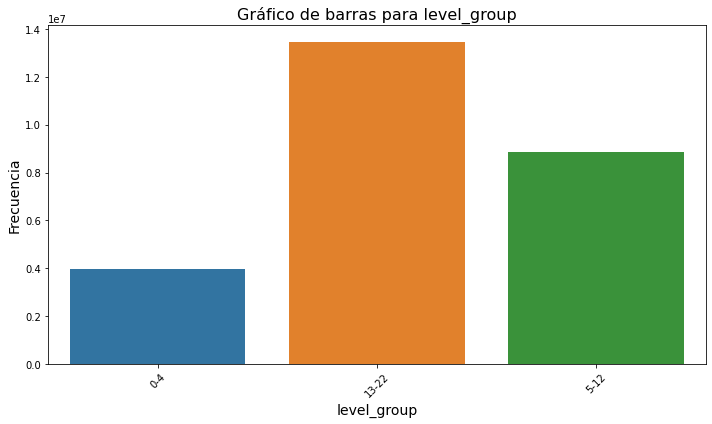

In [78]:
plot_categorical_bar(train_df, "level_group")

In [78]:
train_df.head(1)

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,elapsed_time_log,hover_duration_log
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0.0,NaN
